In [1]:
import pandas as pd   
import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split #, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [2]:
# Read the data

df1 = pd.read_csv("C:/Users/ganwar/Documents/IBA_MSDS/Machine Learning 1/Assignment3/DataSet/diabetes_prediction_dataset.csv")


In [3]:
df1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,NaN,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Scale the data
scaler = preprocessing.MinMaxScaler()
cols_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
dfscal = df1.copy()
dfscal[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

#summary after scaling
dfscal.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,1.000000,0,1,never,0.177171,0.563636,0.272727,0
1,Female,0.674675,0,0,NaN,0.202031,0.563636,0.000000,0
2,Male,0.349349,0,0,never,0.202031,0.400000,0.354545,0
3,Female,0.449449,0,0,current,0.156863,0.272727,0.340909,0
4,Male,0.949950,1,1,current,0.118231,0.236364,0.340909,0


In [5]:
# One hot encoding
df_onehot = pd.get_dummies(df1)
X = df_onehot.loc[:, df_onehot.columns != 'diabetes']
y = df_onehot[['diabetes']]

In [6]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)

In [7]:
trainX.shape

(70000, 12)

In [8]:
#Fitting model and outputting AUC
def fit_model(model, model_name):
    model.fit(trainX,trainy)
    md_probs = model.predict_proba(testX)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testy, md_probs)
    print(model_name, " : ", md_auc)
  

In [9]:
# Variables
num_of_models = 300
depth_level = 5

In [10]:
#Random Forest classifier
#record the start time
start_time = time.time()
rf = RandomForestClassifier(max_depth=10,n_estimators=num_of_models)
fit_model(rf, "Random Forest")
#record the end time
end_time = time.time()
#calculate the total time
total_time = end_time - start_time
print("Total time RF: ", total_time)

#Gradient Boosting classifier
#record the start time
start_time = time.time()
gb = GradientBoostingClassifier(max_depth=depth_level,n_estimators=num_of_models)
fit_model(gb, "Graident Boosting")
#record the end time
end_time = time.time()
#calculate the total time
total_time = end_time - start_time
print("Total time GB: ", total_time)

Random Forest  :  0.9717557183982724
Total time RF:  7.557004928588867
Graident Boosting  :  0.9778240684580123
Total time GB:  22.713041305541992


In [11]:
# Unscalled data frame
df2 = pd.get_dummies(df1)
df2['hypertension'] = df2['hypertension'].astype(int)
df2['gender_Female'] = df2['gender_Female'].astype(int)
df2['gender_Male'] = df2['gender_Male'].astype(int)
df2['gender_Other'] = df2['gender_Other'].astype(int)
df2['smoking_history_current'] = df2['smoking_history_current'].astype(int)
df2['smoking_history_former'] = df2['smoking_history_former'].astype(int)
df2['smoking_history_never'] = df2['smoking_history_never'].astype(int)
df2['smoking_history_never'] = df2['smoking_history_never'].astype(int)
X2 = df2.loc[:, df2.columns != 'diabetes']
y2 = df2[['diabetes']]

trainX2, testX2, trainy2, testy2 = train_test_split(X2, y2, test_size=0.3, random_state=2)
df2.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_former,smoking_history_never
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,1
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,1
3,36.0,0,0,23.45,5.0,155,0,1,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,1,0,0


In [12]:
# Cat Boost classifier
cb = CatBoostClassifier(iterations=num_of_models, depth=depth_level, learning_rate=0.1, loss_function='Logloss', verbose=False)
#record the start time
start_time = time.time()
cb.fit(trainX2,trainy2)
md_probs = cb.predict_proba(testX2)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(testy2, md_probs)
print("Cat Boost", " : ", md_auc)
#record the end time
end_time = time.time()
#calculate the total time
total_time = end_time - start_time
print("Total time CB: ", total_time)


Cat Boost  :  0.9786323576273706
Total time CB:  2.457707643508911


In [13]:
#predict textX2 with cb
cb_pred = cb.predict(testX2)
#compute accuracy between cb_pred and testy2 using sklearn accuracy_score
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(testy2, cb_pred))

 

Accuracy:  0.9702666666666667


In [14]:
# XG Boost classifier
#use xgboost
xgb_model = xgb.XGBClassifier(max_depth=depth_level, n_estimators=num_of_models, learning_rate=0.1)
start_time = time.time()
#fit xgb_model
xgb_model.fit(trainX,trainy)
md_probs = xgb_model.predict_proba(testX)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(testy, md_probs)
print("XG Boost", " : ", md_auc)
#record the end time
end_time = time.time()
#calculate the total time
total_time = end_time - start_time
print("Total time XGB: ", total_time)

XG Boost  :  0.9783766617750898
Total time XGB:  4.0404510498046875


In [15]:
# Light GBM classifier
#use lgboost
lgb_model = lgb.LGBMClassifier(max_depth=depth_level, n_estimators=num_of_models, learning_rate=0.1)
start_time = time.time()
#fit xgb_model
lgb_model.fit(trainX,trainy)
md_probs = lgb_model.predict_proba(testX)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(testy, md_probs)
print("LG Boost", " : ", md_auc)
#record the end time
end_time = time.time()
#calculate the total time
total_time = end_time - start_time
print("Total time LGB: ", total_time)

LG Boost  :  0.9778979016917652
Total time LGB:  0.5679998397827148


<AxesSubplot: title={'center': 'Feature importance (Light GBM)'}, xlabel='Feature importance', ylabel='Features'>

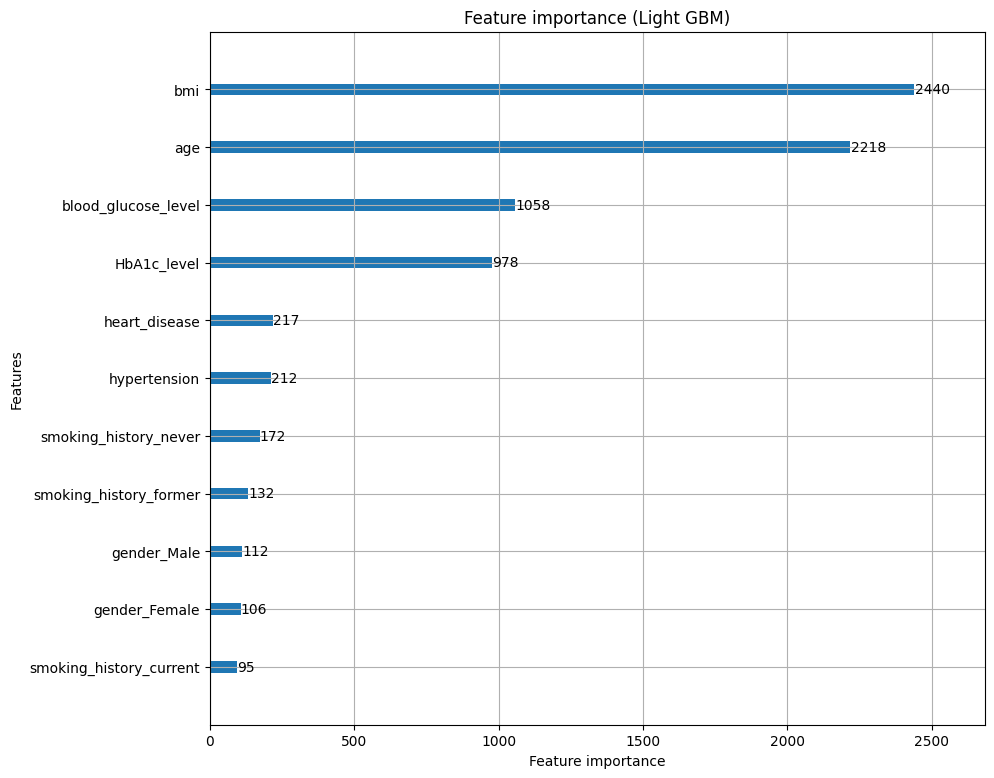

In [16]:
from lightgbm import plot_importance 
plot_importance(lgb_model, figsize=(10, 9),title='Feature importance (Light GBM)')

<AxesSubplot: title={'center': 'XG Boost Classifier feature importance'}, xlabel='F score', ylabel='Features'>

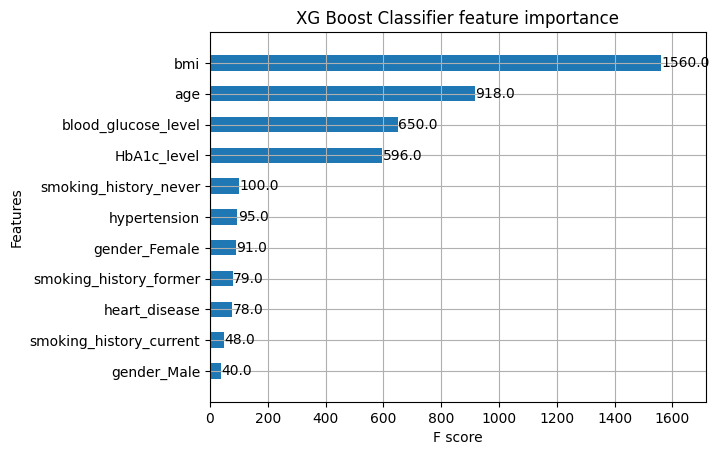

In [17]:

from xgboost import plot_importance
plot_importance(xgb_model,height=0.5,title="XG Boost Classifier feature importance")

In [18]:
cb.get_feature_importance(prettified=True)


,Feature Id,Importances
0,HbA1c_level,43.842409
1,blood_glucose_level,42.427531
2,age,6.466904
3,bmi,3.812708
4,hypertension,0.835525
5,smoking_history_never,0.615482
6,heart_disease,0.589987
7,smoking_history_current,0.416871
8,smoking_history_former,0.413265
9,gender_Female,0.321112


In [19]:
from xgboost import plot_importance

In [20]:
print(xgb_model.feature_importances_)

[0.03776498 0.05446223 0.04535747 0.01619162 0.50256425 0.26300228
 0.0103609  0.02347303 0.         0.01822913 0.01815026 0.01044388]


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

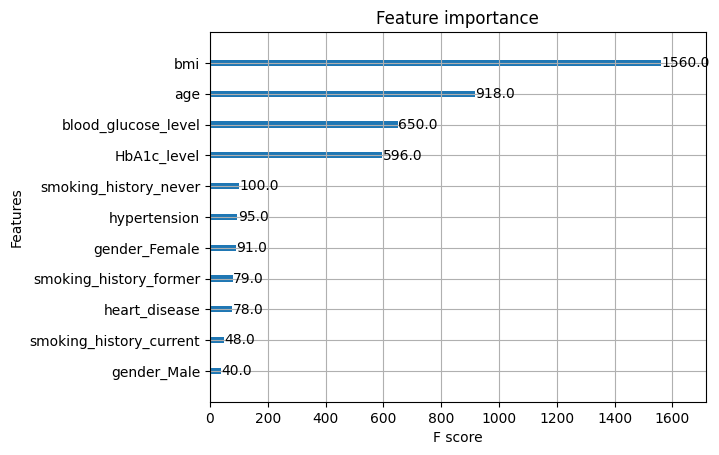

In [21]:
plot_importance(xgb_model)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [23]:
trainX.shape

(70000, 12)

explore batch size, iteration size

In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
# Neural Network classifier
#using multilayer perceptron of sklearn

#mlp = MLPClassifier(hidden_layer_sizes=(33,16), max_iter=20, solver='sgd', verbose=10, random_state=1,
#                    learning_rate_init=.1) #alpha
#mlp = MLPClassifier(hidden_layer_sizes=(33, 16, 10), max_iter=20, solver='sgd', verbose=10, random_state=1,
#                    learning_rate_init=.1)
mlp = MLPClassifier(hidden_layer_sizes=(33, 16, 10), max_iter=50, solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1, batch_size=64)
mlp.fit(trainX, trainy)
print("Training set score: %f" % mlp.score(trainX, trainy))
md_probs = mlp.predict_proba(testX)
md_probs = md_probs[:,1]
md_auc = roc_auc_score(testy, md_probs)
print("MLP", " : ", md_auc)

print("Test set score: %f" % mlp.score(testX, testy))
 

Iteration 1, loss = 710202977.94705129
Iteration 2, loss = 721483827.44337571
Iteration 3, loss = 719020684.07349825
Iteration 4, loss = 716565949.86687887
Iteration 5, loss = 714119596.11451221
Iteration 6, loss = 711681594.20579529
Iteration 7, loss = 709251915.62743700
Iteration 8, loss = 706830531.96356010
Iteration 9, loss = 704417414.89545441
Iteration 10, loss = 702012536.20094478
Iteration 11, loss = 699615867.75416744
Iteration 12, loss = 697227381.52547979
Iteration 13, loss = 694847049.58087111
Iteration 14, loss = 692474844.08131015
Iteration 15, loss = 690110737.28349304
Iteration 16, loss = 687754701.53846872
Iteration 17, loss = 685406709.29150045
Iteration 18, loss = 683066733.08222163
Iteration 19, loss = 680734745.54382896
Iteration 20, loss = 678410719.40315104
Iteration 21, loss = 676094627.47992826
Iteration 22, loss = 673786442.68663752
Iteration 23, loss = 671486138.02879786
Iteration 24, loss = 669193686.60320425
Iteration 25, loss = 666909061.59902298
Iteration

In [26]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from interpret.blackbox import LimeTabular
from interpret import show

In [27]:
lime = LimeTabular(xgb_model, 
                   data=trainX, 
                   random_state=1)
# Get local explanations
lime_local = lime.explain_local(testX[-20:], 
                                testy[-20:], 
                                name='LIME')

In [28]:
show(lime_local)

<!-- http://127.0.0.1:7892/1833515240512/ -->

In [29]:
import dice_ml

In [30]:
data_dice = dice_ml.Data(dataframe=df_onehot, 
                         # For perturbation strategy
                         continuous_features=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], 
                         outcome_name='diabetes')
# Model
rf_dice = dice_ml.Model(model=cb, 
                        # There exist backends for tf, torch, ...
                        backend="sklearn")
explainer = dice_ml.Dice(data_dice, 
                         rf_dice, 
                         # Random sampling, genetic algorithm, kd-tree,...
                         method="random")

In [31]:
    # %% Create explanation
# Generate CF based on the blackbox model
input_datapoint = X[1:2]
input_datapoint['hypertension'] = input_datapoint['hypertension'].astype(int)
input_datapoint['gender_Female'] = input_datapoint['gender_Female'].astype(int)
input_datapoint['gender_Male'] = input_datapoint['gender_Male'].astype(int)
input_datapoint['gender_Other'] = input_datapoint['gender_Other'].astype(int)
input_datapoint['smoking_history_current'] = input_datapoint['smoking_history_current'].astype(int)
input_datapoint['smoking_history_former'] = input_datapoint['smoking_history_former'].astype(int)
input_datapoint['smoking_history_never'] = input_datapoint['smoking_history_never'].astype(int)
input_datapoint['smoking_history_never'] = input_datapoint['smoking_history_never'].astype(int)
input_datapoint.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_former,smoking_history_never
1,54.0,0,0,27.32,6.6,80,1,0,0,0,0,0


In [32]:

# %% Create explanation
# Generate CF based on the blackbox model

cf = explainer.generate_counterfactuals(input_datapoint, 
                                  total_CFs=3,
                                  features_to_vary=["hypertension", "bmi","smoking_history_current", "HbA1c_level","age"],
                                  permitted_range={'bmi': [15, 35], 'HbA1c_level': [2, 7]},
                                  desired_class="opposite")

100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


In [33]:
cf.visualize_as_dataframe(show_only_changes=True)

Query instance (original outcome : 0)


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_former,smoking_history_never,diabetes
0,54.0,0,0,27.32,6.6,80,1,0,0,0,0,0,0



Diverse Counterfactual set (new outcome: 1.0)


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_former,smoking_history_never,diabetes
0,-,0.0,0.0,27.0,6.9,-,1.0,0.0,0.0,1,0.0,0.0,1
1,-,1,0.0,27.0,7.0,-,1.0,0.0,0.0,0.0,0.0,0.0,-
2,-,0.0,0.0,27.0,6.8,-,1.0,0.0,0.0,1,0.0,0.0,1


In [34]:
#Correlation matrix 
df_onehot.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_former,smoking_history_never
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008,0.030480,-0.030282,-0.007348,0.030946,0.218374,0.090485
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823,-0.014318,0.014423,-0.003816,0.017930,0.067249,0.054236
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727,-0.077832,0.077911,-0.002718,0.007604,0.081326,-0.013826
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357,0.023016,-0.023021,0.000119,0.053617,0.112411,0.102759
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660,-0.020015,0.020058,-0.001528,0.006123,0.036399,0.014329
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558,-0.017200,0.017189,0.000457,0.012447,0.038280,0.014719
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000,-0.037553,0.037666,-0.004090,0.019606,0.092127,0.036343
gender_Female,0.030480,-0.014318,-0.077832,0.023016,-0.020015,-0.017200,-0.037553,1.000000,-0.999629,-0.015948,-0.026517,-0.031369,0.092090
gender_Male,-0.030282,0.014423,0.077911,-0.023021,0.020058,0.017189,0.037666,-0.999629,1.000000,-0.011285,0.026636,0.031084,-0.091969
gender_Other,-0.007348,-0.003816,-0.002718,0.000119,-0.001528,0.000457,-0.004090,-0.015948,-0.011285,1.000000,-0.004293,0.010538,-0.004641


In [35]:
#Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
pca = PCA(n_components=1, svd_solver='arpack')
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
train_img_pca = pca.transform(trainX)

[0.75397322 0.22764066]
[12909.55852179  7093.46370373]
[0.75397322 0.22764066]
[12909.55852179  7093.46370373]
[0.75397322]
[12909.55852179]
